In [1]:
import surp
import vice
import arya
import numpy as np
import matplotlib.pyplot as plt

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
def plot_dtd(f):
    x = np.linspace(0, 10, 1000)
    y = [f(xx) / f(1) for xx in x]

    plt.plot(x, y)

In [3]:
f_plateau = surp.simulation.properties.liam_RIa

In [4]:
f_plaw = lambda x: x**-1.1

In [5]:
f_exp = lambda x: np.exp(-x/1.5)

/tmp/ipykernel_1240121/3501865379.py:1: RuntimeWarning: divide by zero encountered in scalar power
  f_plaw = lambda x: x**-1.1


(0.03, 10)

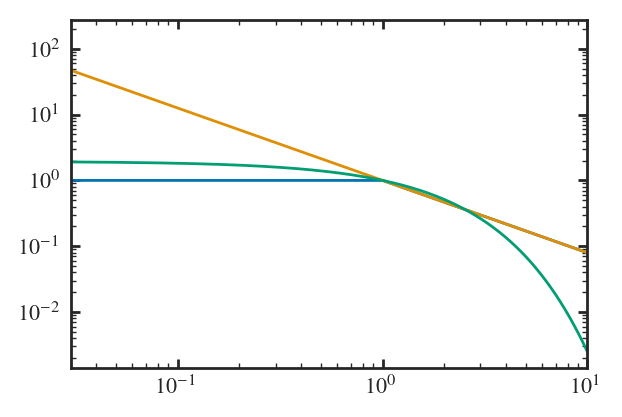

In [6]:
plot_dtd(surp.simulation.properties.liam_RIa)
plot_dtd(f_plaw)
plot_dtd(f_exp)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.03, 10)


In [7]:
from scipy.integrate import quad

In [8]:
quad(f_plateau, 0.03, 1)

(0.97, 1.0769163338864018e-14)

In [9]:
quad(f_plateau, 0.15, 1)

(0.85, 9.43689570931383e-15)

## Singlezone models

In [20]:
surp.set_yields()

In [43]:
import sys
sys.path.append("..")

import singlezone

In [44]:
m0 = singlezone.run_singlezone()
m1 = singlezone.run_singlezone(delay=0.03)

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

In [45]:
m1b = singlezone.run_singlezone(delay=0.03, RIa=f_plaw)

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

In [46]:
m2 = singlezone.run_singlezone(delay=0.03, RIa=f_plateau)

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

In [47]:
def plot_sz(sz, **kwargs):
    h = sz[1]
    plt.plot(h.FE_H, h.MG_FE, **kwargs)
    plt.xlabel("[Fe/H]")
    plt.ylabel("[Mg/Fe]")
    

In [48]:
surp.set_yields()
ytot_fe = vice.yields.ccsne.settings["fe"] + vice.yields.sneia.settings["fe"]
vice.yields.sneia.settings["fe"] *= 0.7
vice.yields.ccsne.settings["fe"] = ytot_fe - vice.yields.sneia.settings["fe"]

m3 = singlezone.run_singlezone()

surp.set_yields()

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

In [52]:
surp.set_yields()
ytot_fe = vice.yields.ccsne.settings["fe"] + vice.yields.sneia.settings["fe"]
vice.yields.sneia.settings["fe"] *= 1.2
vice.yields.ccsne.settings["fe"] = ytot_fe - vice.yields.sneia.settings["fe"]

m4 = singlezone.run_singlezone()

surp.set_yields()

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: C

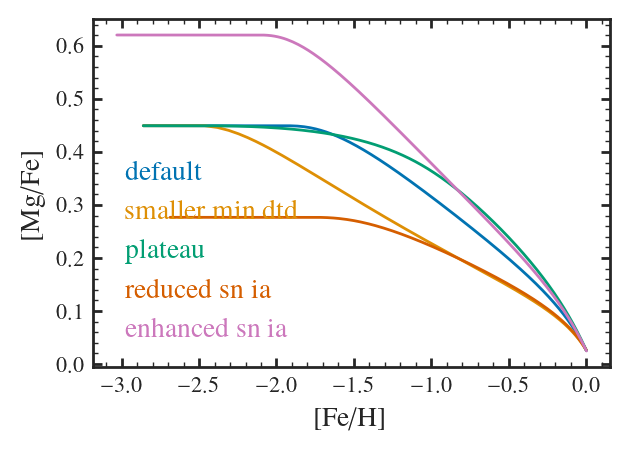

In [53]:
plot_sz(m0, label="default")
plot_sz(m1, label="smaller min dtd")

plot_sz(m2, label="plateau")
plot_sz(m3, label="reduced sn ia")
plot_sz(m4, label="enhanced sn ia")


arya.Legend(color_only=True, loc="lower left")